In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import pandas as pd
import os

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Endoscope Detection/Yolov11/gastroscopy_meta_256.csv")

In [ ]:
df.head()

,image_id,height,width,organ,lesion_label,location,shape_type_polygon,polygon_mask,bounding_box_shape,x_min,y_min,x_max,y_max,lesion
0,1_1_00011.png,256.0,256.0,gastroscopy,0,1,polygon,"1257.45,738.30;1212.77,748.94;1168.09,748.94;1...",rectangle,95.478723,45.744681,163.031915,93.617021,ulcer
1,1_1_00011.png,256.0,256.0,gastroscopy,0,1,polygon,"1421.28,955.32;1387.23,985.11;1368.09,1025.53;...",rectangle,143.617021,112.234043,177.659574,135.372340,ulcer
2,1_1_00014.png,256.0,256.0,gastroscopy,0,1,polygon,"1065.96,1110.64;1040.43,1148.94;1010.64,1182.9...",rectangle,65.159574,70.212766,134.840426,153.191489,ulcer
3,1_1_00017.png,256.0,256.0,gastroscopy,0,1,polygon,"1246.30,514.89;1197.36,508.51;1154.81,502.13;1...",rectangle,110.574468,62.765957,172.010638,94.148936,ulcer
4,1_1_00018.png,256.0,256.0,gastroscopy,0,1,polygon,"1397.36,389.36;1352.68,382.98;1314.38,404.26;1...",rectangle,145.148936,47.872340,206.851064,134.308511,ulcer


In [ ]:
from sklearn.model_selection import StratifiedKFold
df['label'] = df['image_id'].apply(lambda x: int(x.split('_')[1]))

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in skf.split(df, df['label']):
    train_df = df.iloc[train_index]
    val_df = df.iloc[val_index]

train_df.to_csv('train.csv', index=False)
val_df.to_csv('val.csv', index=False)

In [ ]:
label_df = pd.read_csv('/content/drive/MyDrive/Endoscope Detection/Yolov11/val.csv')
image_folder = r'/content/drive/MyDrive/Endoscope Detection/Yolov11/Dataset/images/val'
label_folder = r'/content/drive/MyDrive/Endoscope Detection/Yolov11/Dataset/labels/val'

os.makedirs(label_folder, exist_ok=True)

for img_id in label_df['image_id']:
    img_file_path = os.path.join(image_folder, img_id)

    if os.path.exists(img_file_path):
        group = df[df['image_id'] == img_id]

        label_file_path = os.path.join(label_folder, f'{img_id.replace(".png", ".txt")}')

        with open(label_file_path, 'w') as label_file:
            for _, row in group.iterrows():
                obj_class = row['lesion_label']

                x_min, y_min, x_max, y_max = row['x_min'], row['y_min'], row['x_max'], row['y_max']
                img_width, img_height = row['width'], row['height']

                x_center = (x_min + x_max) / 2 / img_width
                y_center = (y_min + y_max) / 2 / img_height
                width = (x_max - x_min) / img_width
                height = (y_max - y_min) / img_height

                label_file.write(f'{obj_class} {x_center} {y_center} {width} {height}\n')

In [ ]:
!yolo predict model=yolo11n.pt source='https://ultralytics.com/images/zidane.jpg'

100% 5.35M/5.35M [00:00<00:00, 60.3MB/s]
Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

100% 49.2k/49.2k [00:00<00:00, 3.58MB/s]
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 178.2ms
Speed: 24.1ms preprocess, 178.2ms inference, 40.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
from ultralytics.data.augment import Albumentations

def disable_albumentations(self, p=0.0):
    self.p = 0.0
    self.transform = None

Albumentations.__init__ = disable_albumentations

In [ ]:
from ultralytics import YOLO
model = YOLO("yolo11n.pt")

results = model.train(data="/content/drive/MyDrive/Endoscope Detection/Yolov11/Dataset/data.yaml",
                      project="/content/drive/MyDrive/Endoscope Detection/Yolov11/experiment/v2",
                      name="exp2",
                      epochs=50,
                      imgsz=256,
                      hsv_h=0.25,#색조
                      hsv_s=0.25,#채도
                      hsv_v=0.25,#밝기
                      degrees=0.25,#각도
                      translate=0.25,#가로세로 변환
                      scale=0.0,
                      shear=0.0,
                      perspective=0.0,
                      flipud=0.5,#상하반전
                      fliplr=0.5,#좌우반전
                      mosaic=0.0,
                      mixup=0.,
                      auto_augment="none",
                      erasing=0.0,
                      copy_paste=0.0
                      )


100%|██████████| 5.35M/5.35M [00:00<00:00, 72.0MB/s]


Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/Endoscope Detection/Yolov11/Dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Endoscope Detection/Yolov11/experiment/v2, name=exp1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=

100%|██████████| 755k/755k [00:00<00:00, 19.2MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/Endoscope Detection/Yolov11/Dataset/labels/train.cache... 1280 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1280/1280 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Endoscope Detection/Yolov11/Dataset/images/train/1_1_00024.png: 2 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Endoscope Detection/Yolov11/Dataset/images/train/1_1_00027.png: 1 duplicate labels removed



val: Scanning /content/drive/MyDrive/Endoscope Detection/Yolov11/Dataset/labels/val.cache... 320 images, 0 backgrounds, 0 corrupt: 100%|██████████| 320/320 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/Endoscope Detection/Yolov11/experiment/v2/exp1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Endoscope Detection/Yolov11/experiment/v2/exp1
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.516G      1.468      2.959       1.47         19        256: 100%|██████████| 80/80 [04:34<00:00,  3.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]


                   all        320        450      0.352      0.139        0.2     0.0925

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.487G      1.593      2.361      1.537         20        256: 100%|██████████| 80/80 [00:19<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.92it/s]

                   all        320        450      0.166       0.44       0.18     0.0769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.487G      1.614      2.232      1.562         18        256: 100%|██████████| 80/80 [00:18<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.93it/s]

                   all        320        450      0.486      0.263      0.233      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      0.48G      1.612      2.131      1.514         22        256: 100%|██████████| 80/80 [00:19<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  2.00it/s]

                   all        320        450      0.395      0.338        0.3      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      0.48G        1.6      2.026      1.511         19        256: 100%|██████████| 80/80 [00:19<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.76it/s]

                   all        320        450      0.409      0.429      0.369      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      0.48G      1.559      1.923      1.483         26        256: 100%|██████████| 80/80 [00:19<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]

                   all        320        450       0.29       0.43      0.284      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      0.48G      1.509      1.837      1.457         24        256: 100%|██████████| 80/80 [00:19<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.00it/s]

                   all        320        450      0.573      0.452      0.463      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.478G      1.471      1.788      1.415         22        256: 100%|██████████| 80/80 [00:19<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.78it/s]

                   all        320        450       0.53      0.384      0.417      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      0.48G      1.418       1.69      1.405         31        256: 100%|██████████| 80/80 [00:19<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.92it/s]

                   all        320        450      0.463      0.467       0.44      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      0.48G      1.428      1.688      1.396         21        256: 100%|██████████| 80/80 [00:19<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]

                   all        320        450      0.531      0.492      0.489      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      0.48G       1.38      1.636      1.368         25        256: 100%|██████████| 80/80 [00:19<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  2.00it/s]

                   all        320        450      0.561      0.477      0.465      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      0.48G      1.341       1.58      1.358         22        256: 100%|██████████| 80/80 [00:19<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]

                   all        320        450      0.649      0.507      0.541      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      0.48G      1.351      1.538      1.357         17        256: 100%|██████████| 80/80 [00:19<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.99it/s]

                   all        320        450      0.636      0.493      0.535      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.478G      1.356      1.538      1.367         21        256: 100%|██████████| 80/80 [00:19<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.31it/s]

                   all        320        450      0.619       0.51      0.536      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.478G      1.307      1.492      1.319         22        256: 100%|██████████| 80/80 [00:19<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.05it/s]

                   all        320        450      0.542      0.517      0.514      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.478G      1.327      1.464      1.349         20        256: 100%|██████████| 80/80 [00:19<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]


                   all        320        450      0.547      0.513      0.506      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      0.48G      1.315      1.444      1.341         23        256: 100%|██████████| 80/80 [00:19<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]

                   all        320        450      0.587      0.528      0.543      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.478G      1.306      1.457      1.332         16        256: 100%|██████████| 80/80 [00:19<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.61it/s]

                   all        320        450      0.611      0.513      0.531      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.478G      1.289      1.401      1.315         16        256: 100%|██████████| 80/80 [00:19<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.46it/s]

                   all        320        450      0.682      0.525      0.565      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      0.48G      1.249      1.379      1.288         29        256: 100%|██████████| 80/80 [00:19<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]

                   all        320        450      0.623      0.566       0.58      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.478G      1.239      1.382      1.307         25        256: 100%|██████████| 80/80 [00:19<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]

                   all        320        450       0.63      0.538      0.544      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.478G      1.238      1.327      1.293         36        256: 100%|██████████| 80/80 [00:19<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.60it/s]

                   all        320        450      0.644       0.55       0.59      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.478G      1.232      1.301      1.292         26        256: 100%|██████████| 80/80 [00:19<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.54it/s]

                   all        320        450      0.612      0.512      0.566      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.478G      1.211      1.275      1.273         24        256: 100%|██████████| 80/80 [00:19<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]

                   all        320        450      0.657      0.498      0.569      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.478G      1.206      1.262      1.264         21        256: 100%|██████████| 80/80 [00:19<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.62it/s]

                   all        320        450      0.741      0.526      0.591      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.478G      1.174      1.253       1.25         19        256: 100%|██████████| 80/80 [00:19<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.22it/s]

                   all        320        450      0.665      0.525      0.584      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.478G       1.17      1.248      1.256         22        256: 100%|██████████| 80/80 [00:19<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.52it/s]

                   all        320        450      0.592      0.593      0.591      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.478G       1.16      1.229      1.255         22        256: 100%|██████████| 80/80 [00:19<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]

                   all        320        450      0.604      0.568      0.571      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.478G      1.142       1.22       1.25         21        256: 100%|██████████| 80/80 [00:19<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]

                   all        320        450      0.754      0.517      0.598      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.478G      1.132      1.181      1.233         23        256: 100%|██████████| 80/80 [00:19<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.10it/s]

                   all        320        450      0.628      0.567      0.594      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.478G      1.123      1.164      1.229         17        256: 100%|██████████| 80/80 [00:19<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]

                   all        320        450      0.667      0.608      0.616      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.478G      1.148      1.163      1.242         18        256: 100%|██████████| 80/80 [00:19<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.97it/s]

                   all        320        450       0.77      0.576      0.643      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.478G      1.113      1.124      1.228         28        256: 100%|██████████| 80/80 [00:19<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.35it/s]

                   all        320        450      0.671      0.563      0.606      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.478G      1.118       1.13      1.223         23        256: 100%|██████████| 80/80 [00:19<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.27it/s]

                   all        320        450      0.729      0.561      0.619      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.478G      1.086      1.108      1.203         22        256: 100%|██████████| 80/80 [00:19<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.39it/s]

                   all        320        450        0.7      0.571      0.642      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.478G      1.113      1.094      1.226         18        256: 100%|██████████| 80/80 [00:18<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]

                   all        320        450       0.71      0.578      0.624      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50     0.478G      1.082      1.053      1.203         22        256: 100%|██████████| 80/80 [00:18<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.20it/s]

                   all        320        450      0.658      0.603       0.62      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50     0.478G      1.056      1.044      1.191         24        256: 100%|██████████| 80/80 [00:19<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.25it/s]

                   all        320        450      0.783       0.56      0.635      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50     0.478G      1.044      1.035      1.192         20        256: 100%|██████████| 80/80 [00:19<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]

                   all        320        450       0.71      0.599      0.639      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50     0.478G      1.021     0.9981      1.166         20        256: 100%|██████████| 80/80 [00:19<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]

                   all        320        450      0.736      0.574      0.643      0.365


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50     0.478G      1.043      1.006      1.188         19        256: 100%|██████████| 80/80 [00:20<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.51it/s]

                   all        320        450      0.775      0.557      0.643      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50     0.478G      1.012     0.9772      1.165         27        256: 100%|██████████| 80/80 [00:19<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.11it/s]

                   all        320        450       0.83      0.547       0.66      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50     0.478G      1.001     0.9407      1.168         23        256: 100%|██████████| 80/80 [00:19<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]

                   all        320        450      0.767      0.587      0.652      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50     0.478G      1.007     0.9444      1.163         19        256: 100%|██████████| 80/80 [00:19<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]

                   all        320        450       0.79      0.608      0.667      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      0.48G      1.004     0.9462      1.163         19        256: 100%|██████████| 80/80 [00:18<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.26it/s]

                   all        320        450      0.777      0.604      0.659      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50     0.478G       0.97     0.9137      1.142         20        256: 100%|██████████| 80/80 [00:19<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.10it/s]

                   all        320        450       0.74        0.6      0.657      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50     0.478G     0.9627     0.8932      1.143         26        256: 100%|██████████| 80/80 [00:19<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]

                   all        320        450      0.788      0.581      0.656      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50     0.478G     0.9786      0.915       1.15         22        256: 100%|██████████| 80/80 [00:19<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]

                   all        320        450      0.744      0.613      0.664      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50     0.478G     0.9533     0.8886       1.14         20        256: 100%|██████████| 80/80 [00:18<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.60it/s]

                   all        320        450      0.795       0.59      0.664      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50     0.478G     0.9344     0.8625       1.13         24        256: 100%|██████████| 80/80 [00:19<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        320        450      0.773      0.587       0.66      0.389



50 epochs completed in 0.404 hours.
Optimizer stripped from /content/drive/MyDrive/Endoscope Detection/Yolov11/experiment/v2/exp1/weights/last.pt, 5.4MB
Optimizer stripped from /content/drive/MyDrive/Endoscope Detection/Yolov11/experiment/v2/exp1/weights/best.pt, 5.4MB

Validating /content/drive/MyDrive/Endoscope Detection/Yolov11/experiment/v2/exp1/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.38it/s]


                   all        320        450      0.803      0.585      0.664      0.391
                 ulcer         80        108       0.76      0.417      0.523      0.284
                 polyp         80        148      0.858      0.689      0.759      0.452
                cancer        160        194       0.79      0.649       0.71      0.438
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to /content/drive/MyDrive/Endoscope Detection/Yolov11/experiment/v2/exp1


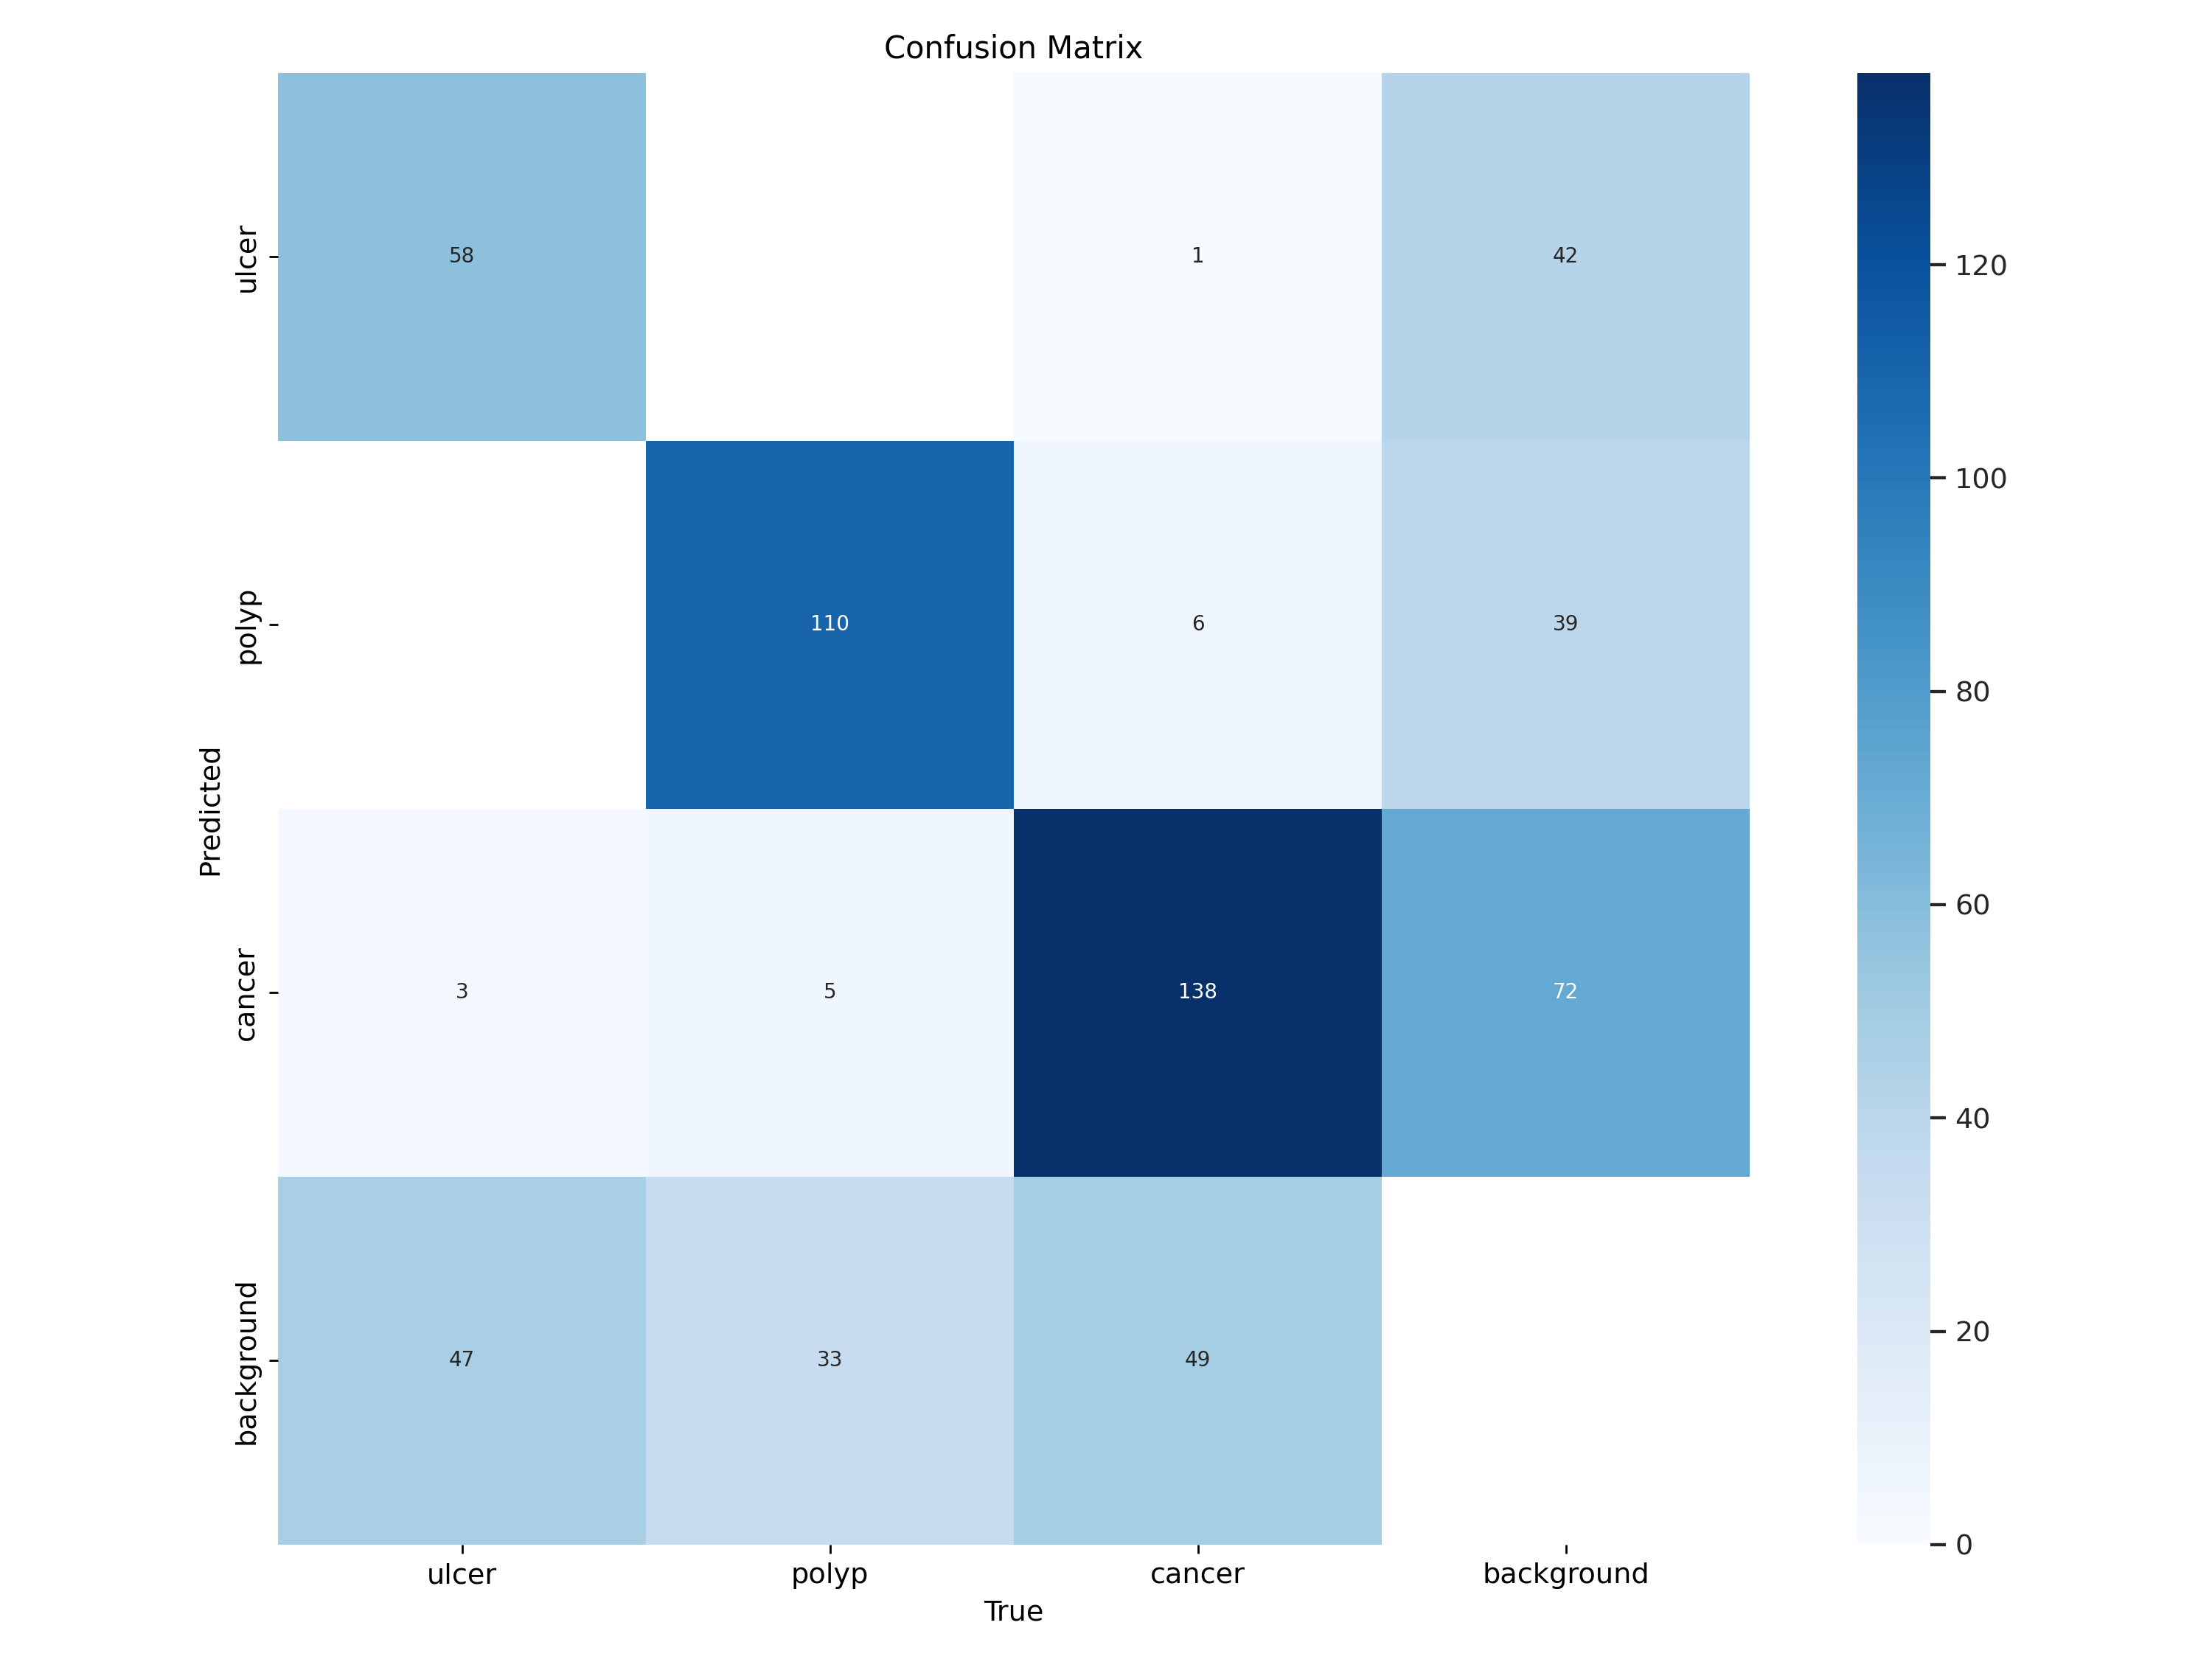

In [2]:
from PIL import Image
Image.open('/content/drive/MyDrive/Endoscope Detection/Yolov11/experiment/v2/exp1/confusion_matrix.png')

증강

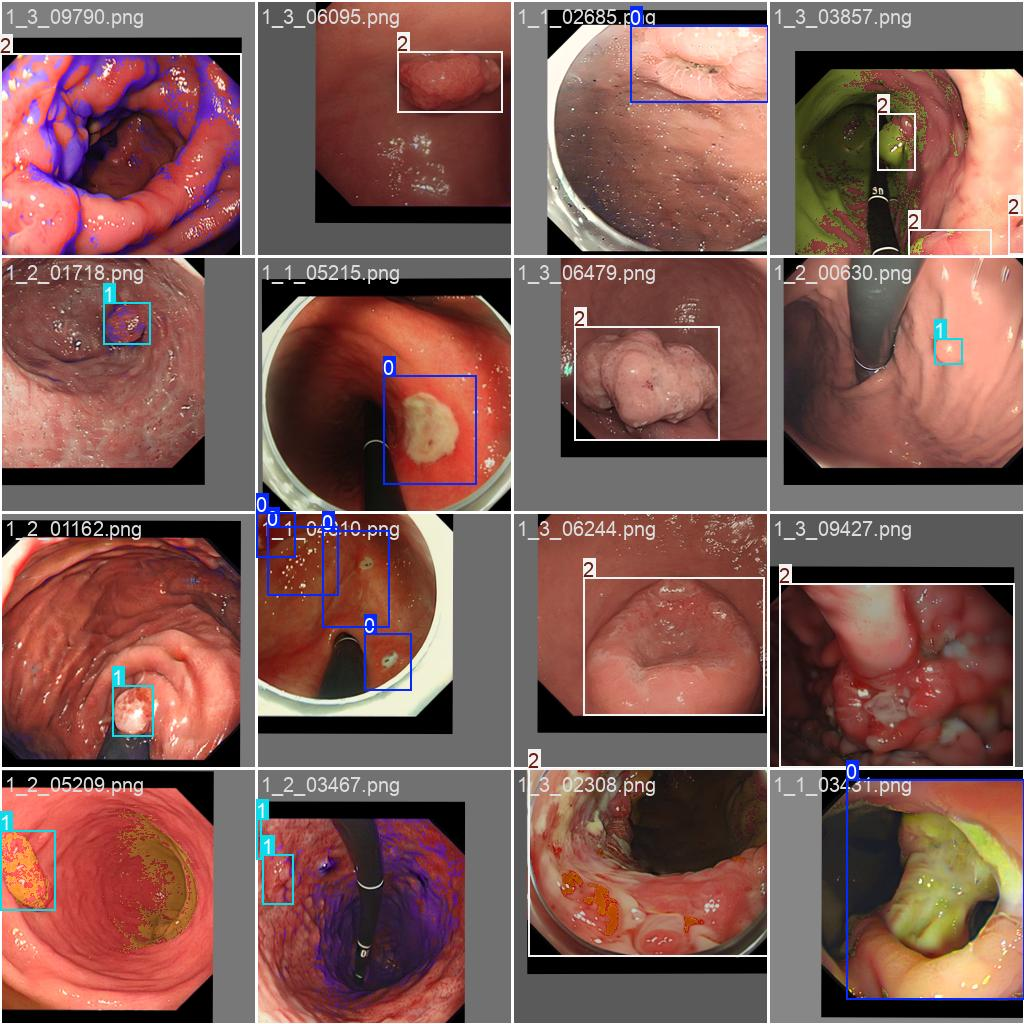

In [ ]:
Image.open('/content/drive/MyDrive/Endoscope Detection/Yolov11/experiment/v2/exp1/confusion_matrix.png')